In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import math as m
from scipy.stats import boxcox
%matplotlib inline

In [58]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.shape

(418, 11)

В ходе решения Titanic_2.0 мы получили baseline- 0.76077, проведем глубокое исследование данных и попытаемся улучшить эти значения

Только 2 непрерывных признака, остальные дискретные. Возмодно можно будет понастраивать кодирование признаков

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


В обоих выборках много пропусков занчений признака "Age", практически отсутствуют значения признака "Cabin", пропущено одно значение прзнака Fare  в тестовой выборке

## Survived

In [7]:
train.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

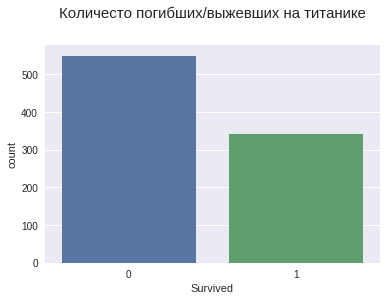

In [8]:
plt.title(u'Количесто погибших/выжевших на титанике', y= 1.1, size=15)
sns.countplot(x='Survived', data = train)

Классы получились не сбалансированными, учесть это при обучении моделей

## Pclass

In [9]:
train.Pclass.describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

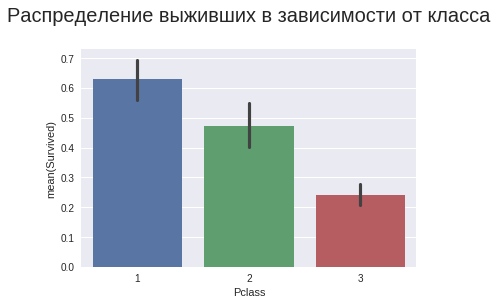

In [22]:
plt.title(u'Распределение выживших в зависимости от класса', y= 1.1, size = 20 )
sns.barplot(x = 'Pclass', y = 'Survived', data = train)

сильный признак

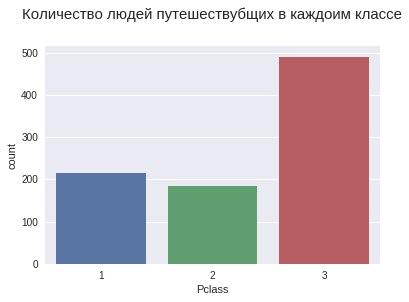

In [24]:
plt.title(u'Количество людей путешествубщих в каждоим классе', y= 1.1, size=15)
sns.countplot(x='Pclass', data = train)

## Sex

In [27]:
sex_encoder  = LabelEncoder()
train['Sex_enc'] = sex_encoder.fit_transform(train.Sex)
test['Sex_enc'] = sex_encoder.transform(test.Sex)

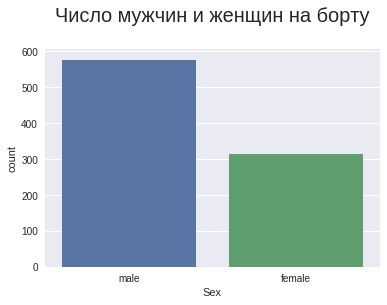

In [29]:
plt.title(u'Число мужчин и женщин на борту', y =1.1, size = 20)
sns.countplot(x='Sex', data = train)

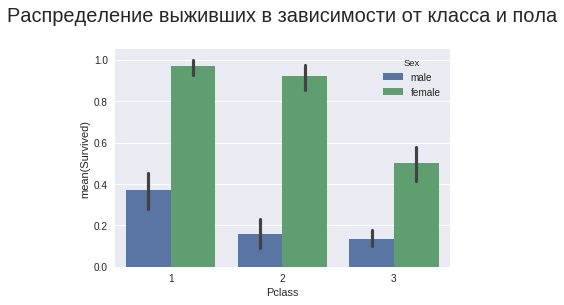

In [30]:
plt.title(u'Распределение выживших в зависимости от класса и пола', y= 1.1, size = 20 )
sns.barplot(x = 'Pclass', y = 'Survived', data = train, hue = 'Sex')

Класс и пол - очень сильные признаки

## SibSp and Parch

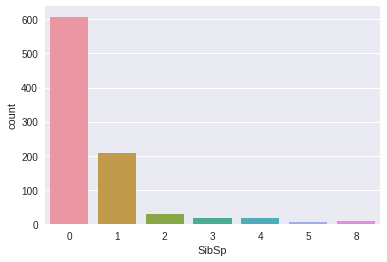

In [39]:
sns.countplot(x='SibSp', data = train)

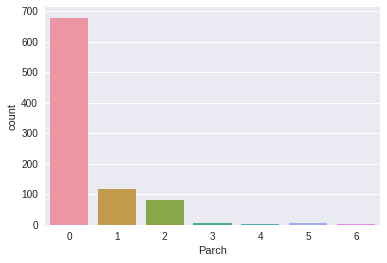

In [44]:
sns.countplot(x='Parch', data = train)

создадим признак Family Size, чтобы добавить вес правому краю распредления

In [4]:
for df in [train,test]:
    df['Fam_size'] = df.Parch + df.SibSp

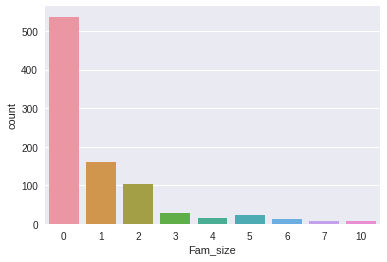

In [5]:
sns.countplot(x='Fam_size', data = train)

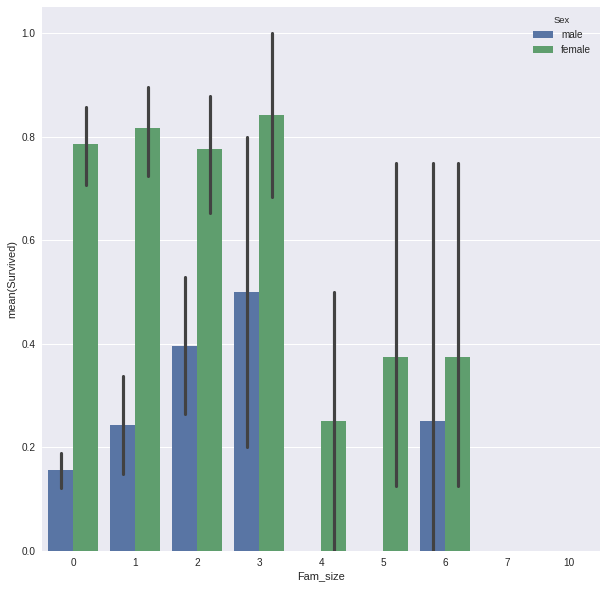

In [48]:
fig = plt.figure(figsize = (10,10))
sns.barplot(x='Fam_size', y = 'Survived', hue = 'Sex',data = train)

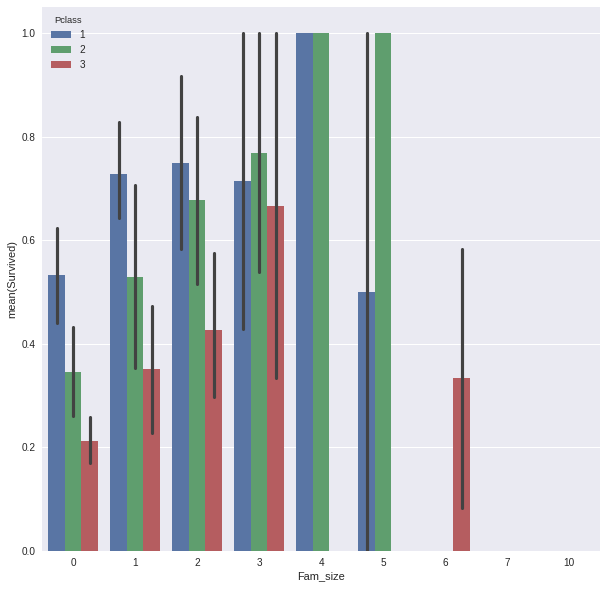

In [49]:
fig = plt.figure(figsize = (10,10))
sns.barplot(x='Fam_size', y = 'Survived', hue = 'Pclass',data = train)

Очень сильный признак. Бездетные люди из 3 класса практически не имели шансов выжить

## Ticket

In [6]:
train.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [7]:
for elem in df.Ticket:
    print elem
    #print elem[0]

330911
363272
240276
315154
3101298
7538
330972
248738
2657
A/4 48871
349220
694
21228
24065
W.E.P. 5734
SC/PARIS 2167
233734
2692
STON/O2. 3101270
2696
PC 17603
C 17368
PC 17598
PC 17597
PC 17608
A/5. 3337
113509
2698
113054
2662
SC/AH 3085
C.A. 31029
C.A. 2315
W./C. 6607
13236
2682
342712
315087
345768
1601
349256
113778
SOTON/O.Q. 3101263
237249
11753
STON/O 2. 3101291
PC 17594
370374
11813
C.A. 37671
13695
SC/PARIS 2168
29105
19950
SC/A.3 2861
382652
349230
348122
386525
PC 17608
349232
237216
347090
334914
PC 17608
F.C.C. 13534
330963
113796
2543
19950
382653
349211
3101297
PC 17562
113503
113503
359306
11770
248744
368702
2678
PC 17483
19924
349238
240261
2660
330844
A/4 31416
364856
29103
347072
345498
F.C. 12750
376563
13905
350033
19877
STON/O 2. 3101268
347471
A./5. 3338
11778
228414
365235
347070
2625
C 4001
330920
383162
3410
248734
237734
330968
PC 17531
329944
PC 17483
2680
2681
PP 9549
13050
SC/AH 29037
C.A. 33595
367227
13236
392095
368783
371362
350045
367226
211535
34

Первая буква билета может означать серию или еще какую-то информаци о продавце билетов, что возможно могло повлиять на групировку пассажиров на борту

In [8]:
train['letter'] = df.Ticket.apply(lambda x: x[0])

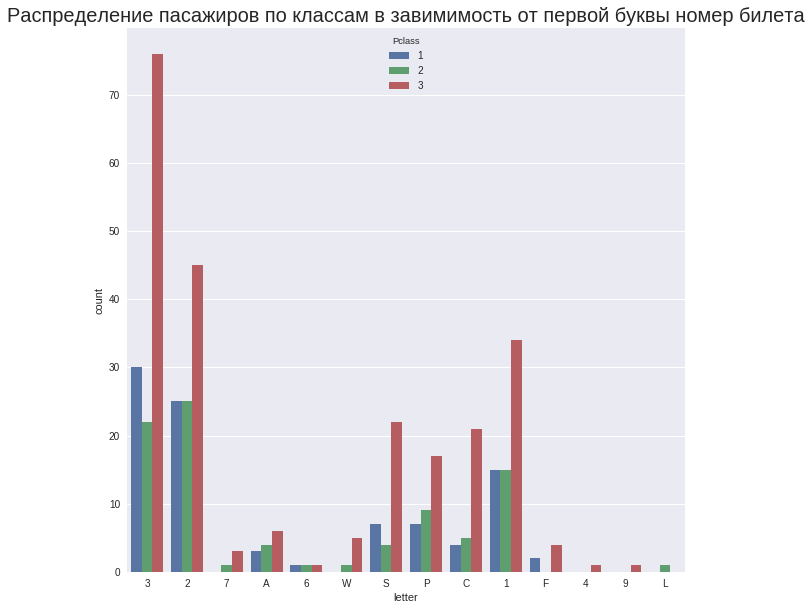

In [9]:
fig = plt.figure(figsize = (10,10))
plt.title(u'Распределение пасажиров по классам в завимимость от первой буквы номер билета', size = 20)
sns.countplot(x='letter',hue='Pclass', data = train)

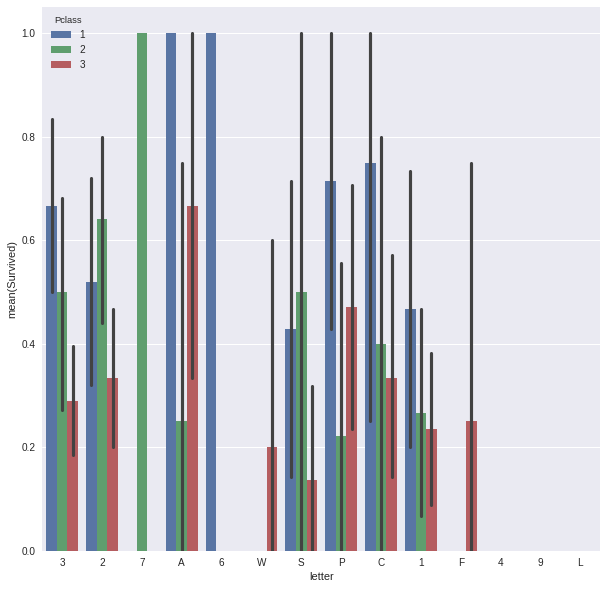

In [10]:
fig = plt.figure(figsize = (10,10))
sns.barplot(x='letter',y = 'Survived', hue='Pclass', data = train)

Признак слабоват


Некоторые номера билетов повторяются, разделим их на повторяющиеся и нет

In [26]:
ticket = pd.concat((train.Ticket, test.Ticket), ignore_index = True)
ticket_freq = ticket.value_counts()

for df in (train,test):
    fticket_list = []
    for elem in df.Ticket:
        if ticket_freq[str(elem)]>1:
            fticket_list.append(1)
        else:
            fticket_list.append(0)
    df['ticket_freq'] = fticket_list

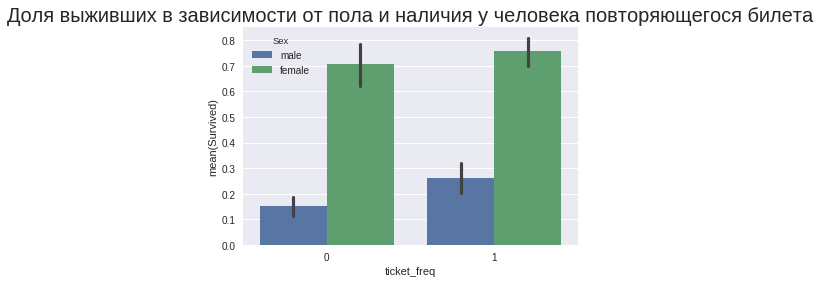

In [31]:
plt.title(u'Доля выживших в зависимости от пола и наличия у человека повторяющегося билета', size = 20)
sns.barplot(x = 'ticket_freq', y = 'Survived', data = train, hue = 'Sex')

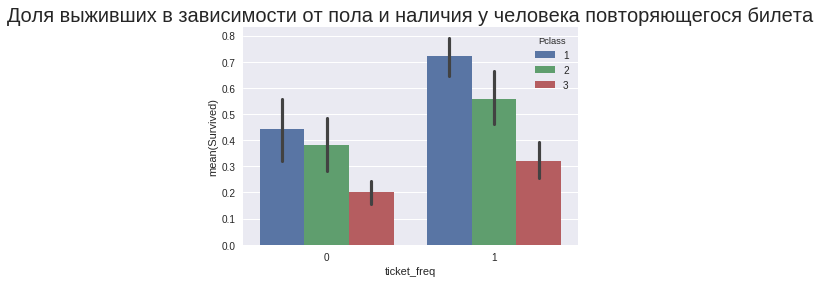

In [32]:
plt.title(u'Доля выживших в зависимости от пола и наличия у человека повторяющегося билета', size = 20)
sns.barplot(x = 'ticket_freq', y = 'Survived', data = train, hue = 'Pclass')

Признак средней силы, так как перекрываются доверительные интервалы

## Fare

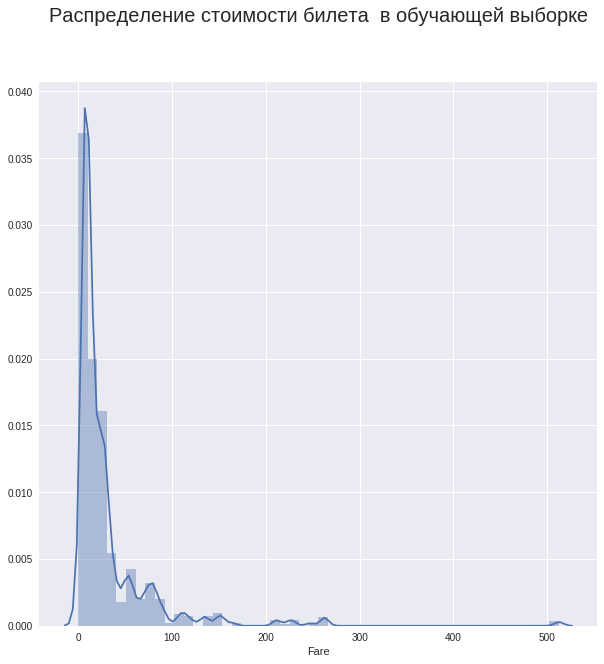

In [11]:
fig = plt.figure(figsize=(10,10))
plt.title(u'Распределение стоимости билета  в обучающей выборке', y= 1.1, size = 20 )
sns.distplot(train.Fare)

In [50]:
train.Fare.loc[train.Fare == 0]

179    0.0
263    0.0
271    0.0
277    0.0
302    0.0
413    0.0
466    0.0
481    0.0
597    0.0
633    0.0
674    0.0
732    0.0
806    0.0
815    0.0
822    0.0
Name: Fare, dtype: float64

Есть пасажиры которые ехали бесплатно, иследовать позже

In [ ]:
заменим нули на 0,001 

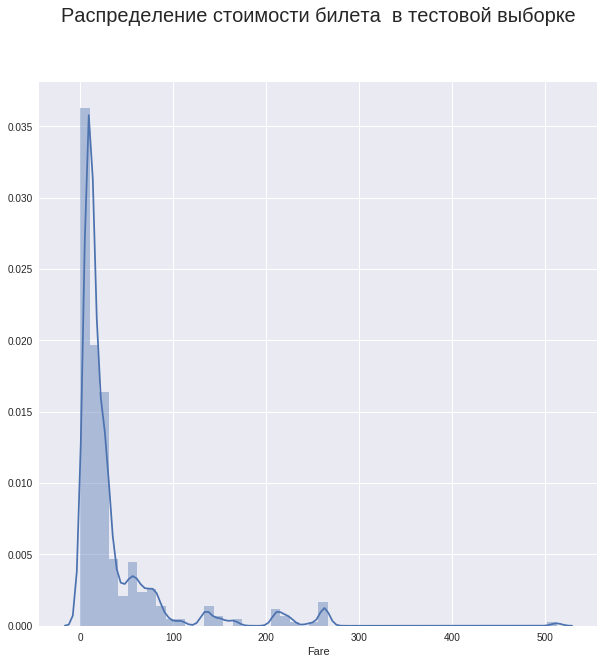

In [14]:
fig = plt.figure(figsize=(10,10))
plt.title(u'Распределение стоимости билета  в тестовой выборке', y= 1.1, size = 20 )
sns.distplot(test.Fare.loc[test.Fare.isnull() == False])

In [51]:
train['log_fare'] = train.Fare.apply(np.log).round(3)


In [48]:
for elem in train.Fare:
    if np.log(elem) == float('-inf'):
        elem

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


/home/vokirill/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


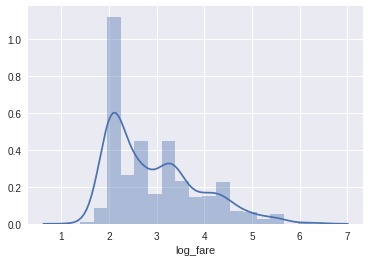

In [54]:
sns.distplot(train.log_fare.loc[train.log_fare != float('-inf')])

In [66]:
train['box_fare'] = boxcox(train.Fare.loc[train.Fare >0])


ValueError: Length of values does not match length of index

In [ ]:
train.Fare.loc[train.Fare <= 0]

## Age
возьмемся под конец, так как надо заполнять пробелы

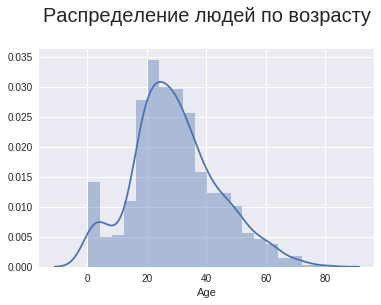

In [37]:
plt.title(u'Распределение людей по возрасту', y= 1.1, size = 20 )
sns.distplot(train.Age.loc[train.Age.isnull()== False])

In [38]:
train.Age.loc[train.Age.isnull()== False].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64